In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 라이브러리 사용

In [ ]:
!apt install -y fonts-nanum # 한글사용
!fc-cache -fv

applyfont = "NanumBarunGothic" # 적용폰트 = 나눔바른고딕

import matplotlib.font_manager as fm
if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
  fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

plt.rc("font", family=applyfont)
plt.rc("axes", unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Google Colab에서 하는거라 내 드라이브에 마운트 연결

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = r"/content/drive/MyDrive/Colab Notebooks/0317/daejeon_covid19.csv"
# 구글 드라이브에 있는 seoul_covid19.csv 파일 경로 변수 저장

In [ ]:
df_covid = pd.read_csv(path, encoding="cp949")
df_covid
# df_covid에 파일 저장, 잘 되었는지 확인

,일자,요일,확진자수
0,2023-01-01,일,1655
1,2023-01-02,월,739
2,2023-01-03,화,2364
3,2023-01-04,수,2191
4,2023-01-05,목,1726
...,...,...,...
238,2023-08-27,일,1046
239,2023-08-28,월,410
240,2023-08-29,화,1453
241,2023-08-30,수,1248


In [ ]:
df_covid.columns # df_covid의 열들이 뭔지 확인

Index(['일자', '요일', '확진자수'], dtype='object')

In [ ]:
len(df_covid.columns) # df_covid의 열 개수 확인

3

In [ ]:
df_covid.info() # df_covid 의 info 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      243 non-null    object
 1   요일      243 non-null    object
 2   확진자수    243 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.8+ KB


In [ ]:
len(df_covid) # 몇행인지 확인

243

In [ ]:
df_covid["일자"] = pd.to_datetime(df_covid["일자"])

<ipython-input-118-f3061258e10d>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


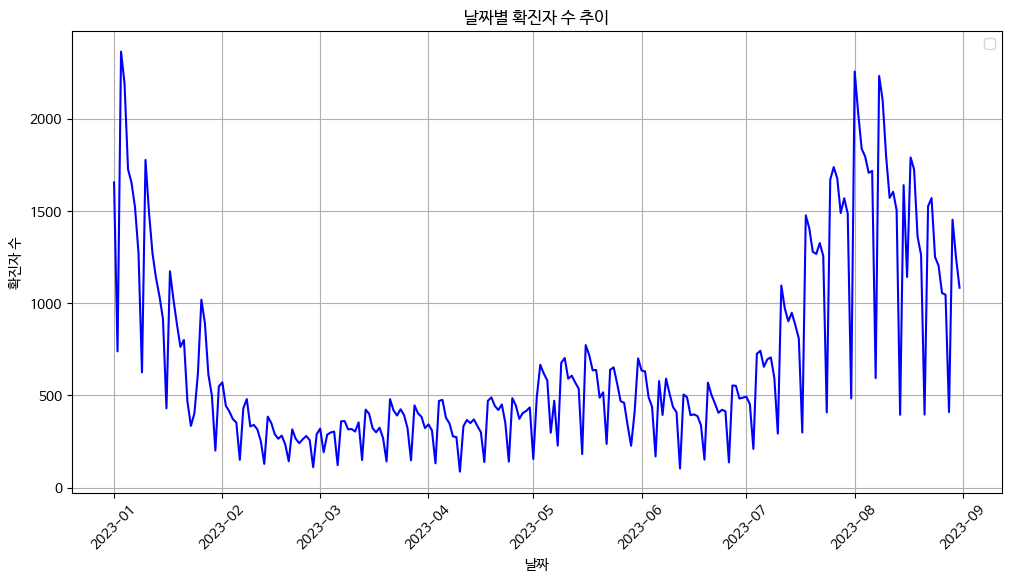

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_covid["일자"], df_covid["확진자수"], marker="", linestyle="-", color="b")
plt.xlabel("날짜")
plt.ylabel("확진자 수")
plt.title("날짜별 확진자 수 추이")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
df_covid["10일 EMA"] = df_covid["확진자수"].ewm(span=10, adjust=False).mean() # 지수이동평균

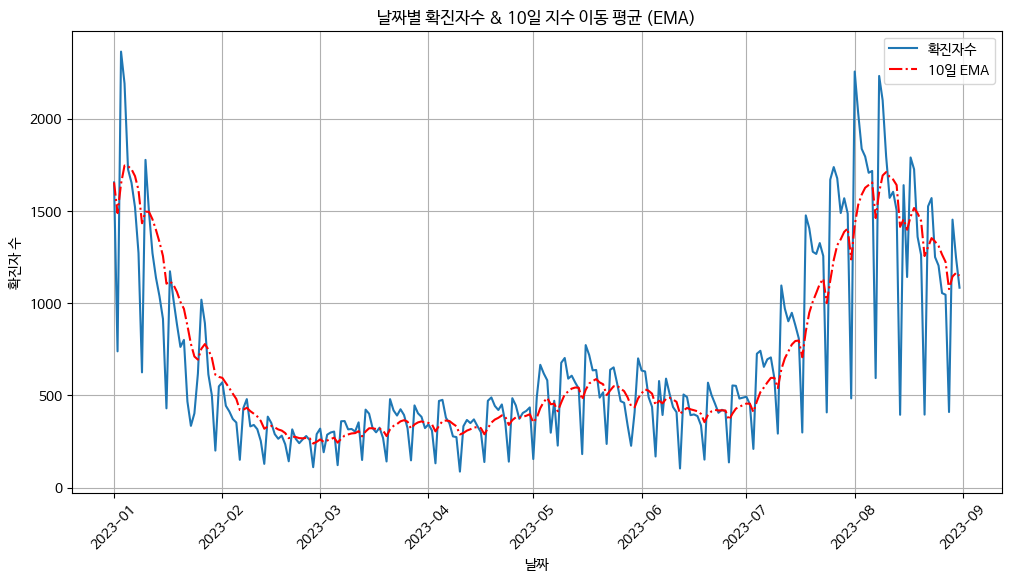

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_covid["일자"], df_covid["확진자수"], linestyle="-", label="확진자수")
plt.plot(df_covid["일자"], df_covid["10일 EMA"], linestyle="-.", color="red", label="10일 EMA")

plt.xlabel("날짜")
plt.ylabel("확진자 수")
plt.title("날짜별 확진자수 & 10일 지수 이동 평균 (EMA)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
df_covid["10일 SMA"] = df_covid["확진자수"].rolling(window=10).mean() # 단순이동평균

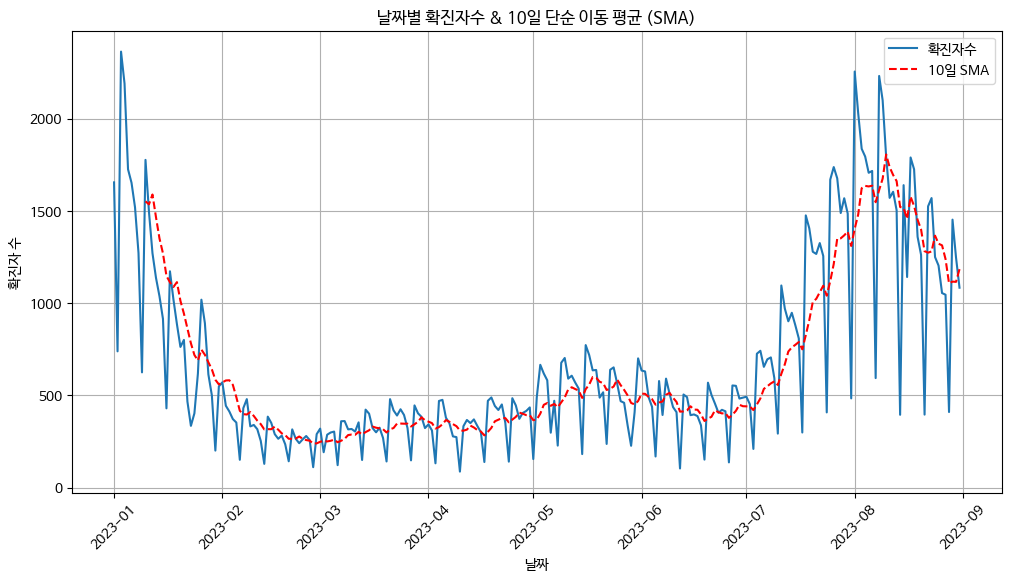

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_covid["일자"], df_covid["확진자수"], linestyle="-", label="확진자수")
plt.plot(df_covid["일자"], df_covid["10일 SMA"], linestyle="--", color="red", label="10일 SMA")

plt.xlabel("날짜")
plt.ylabel("확진자 수")
plt.title("날짜별 확진자수 & 10일 단순 이동 평균 (SMA)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

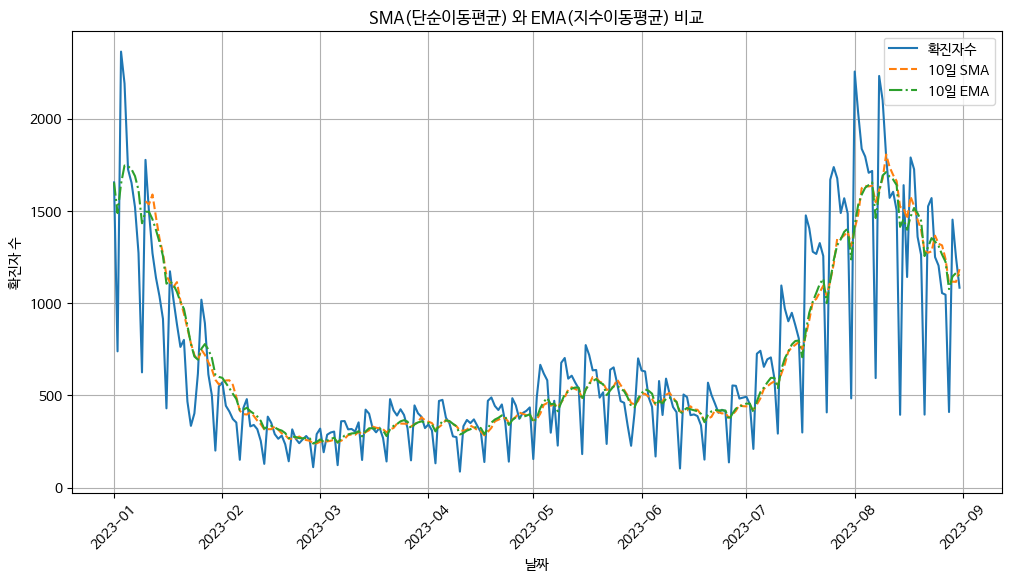

In [ ]:
df_covid["10일 EMA"] = df_covid["확진자수"].ewm(span=10, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_covid["일자"], df_covid["확진자수"], linestyle="-", label="확진자수")
plt.plot(df_covid["일자"], df_covid["10일 SMA"], linestyle="--", label="10일 SMA")
plt.plot(df_covid["일자"], df_covid["10일 EMA"], linestyle="-.", label="10일 EMA")

plt.xlabel("날짜")
plt.ylabel("확진자 수")
plt.title("SMA(단순이동편균) 와 EMA(지수이동평균) 비교")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()